# Importing Libraries


In [1]:
#importing libraries
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from keras.utils import to_categorical, plot_model
import os

In [2]:
encoder = OneHotEncoder()# Create an instance of OneHotEncoder
encoder.fit([[0], [1]]) # Fit the encoder on the  dataset with two classes: 0 and 1

# 0 - Poisonous
# 1 - Edible

OneHotEncoder()

# Dataset Reading

###  Edible Mushroom Images

In [16]:
data = []
paths = []
result = []

for r, d, f in os.walk("Edible"):
    for file in f:
        if '.jpg'  or '.jpeg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [18]:
len(data)

272

### Poisonous Mushroom Images

In [4]:
paths = []
for r, d, f in os.walk("Poisonous"):
    for file in f:
        if '.jpg' or 'jpeg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
data = np.array(data)#list to array conversion
data.shape

(544, 128, 128, 3)

In [6]:
result = np.array(result)#list to array conversion
result = result.reshape(544,2)#reshaping the result 

# Visualization of Mushroom Images

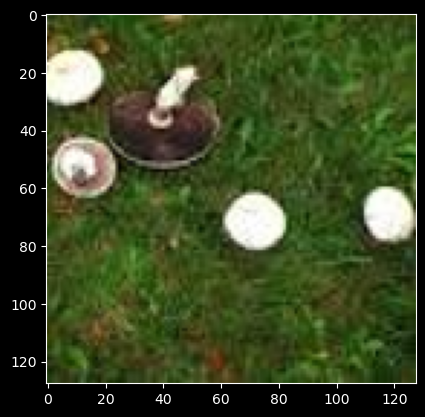

In [7]:
plt.imshow(data[10])

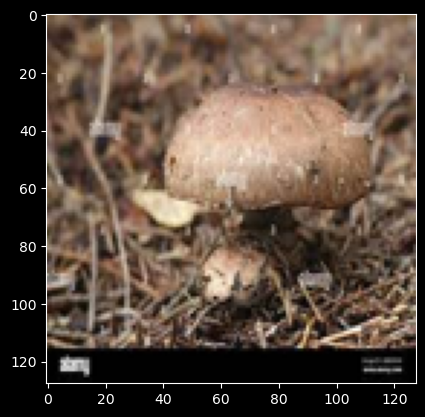

In [8]:
plt.imshow(data[50])

## Train data Test data Splitting

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Model Creation Using Sequential Method (CNN MODEL)

In [10]:
# Create a Sequential model
model = Sequential()
#  Convolutional Layer
model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))

# Batch Normalization for regularization
model.add(BatchNormalization())
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout for regularization
model.add(Dropout(0.25))

#  Convolutional Layer
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

# Batch Normalization for regularization
model.add(BatchNormalization())
# Max Pooling Layer with strides
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# Dropout for regularization
model.add(Dropout(0.25))
# Flatten layer to transition from convolutional layers to fully connected layers
model.add(Flatten())
# Fully Connected Layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))
# Dropout for regularization
model.add(Dropout(0.5))
# Output layer with 2 units and sigmoid activation (binary classification)
model.add(Dense(2, activation='sigmoid'))
# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

## Model Configuration

In [11]:
model.compile(loss = "binary_crossentropy", optimizer='Adam',metrics=['accuracy'])

### Plotting Model Creation Summary

In [12]:
x_train.shape

(435, 128, 128, 3)

In [13]:
y_train.shape

(435, 2)

## Model Training 

In [14]:
 model.fit(x_train, y_train, epochs = 10, batch_size = 64,validation_data = (x_test, y_test))

Epoch 1/10
7/7 [==============================] - 17s 2s/step - loss: 12.5569 - accuracy: 0.6644 - val_loss: 78.1462 - val_accuracy: 0.5321
Epoch 2/10
7/7 [==============================] - 16s 2s/step - loss: 1.8285 - accuracy: 0.8782 - val_loss: 27.5251 - val_accuracy: 0.5321
Epoch 3/10
7/7 [==============================] - 15s 2s/step - loss: 1.2459 - accuracy: 0.9218 - val_loss: 17.9664 - val_accuracy: 0.5321
Epoch 4/10
7/7 [==============================] - 16s 2s/step - loss: 0.3841 - accuracy: 0.9494 - val_loss: 11.0323 - val_accuracy: 0.5872
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.2454 - accuracy: 0.9563 - val_loss: 13.2441 - val_accuracy: 0.5780
Epoch 6/10
7/7 [==============================] - 16s 2s/step - loss: 0.1550 - accuracy: 0.9816 - val_loss: 15.3410 - val_accuracy: 0.5780
Epoch 7/10
7/7 [==============================] - 16s 2s/step - loss: 0.1811 - accuracy: 0.9816 - val_loss: 16.5048 - val_accuracy: 0.5505
Epoch 8/10
7/7 [==========

## Model Evaluation 

In [15]:
score = model.evaluate(x_test, y_test, batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

2/2 [==============================] - 1s 410ms/step - loss: 6.4448 - accuracy: 0.6055

Test accuracy: 60.6%
